In [798]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [799]:
data=pd.read_excel(r"C:\Users\karth\Downloads\Data_Train.xlsx")

In [800]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [801]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


(10683, 11)

In [802]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [803]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [804]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [805]:
data[data['Route'].isna()|data['Total_Stops'].isna()]#to find the missing data setb

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [806]:
data.dropna(inplace=True)#dropping the row with NaN value and making it permenant
data.isna().sum()
data.shape#confirming that the row is deleted

(10682, 11)

In [807]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [808]:
def convert_duration(duration):#converting duration to single unit
    if len(duration.split())==2:
        return int(duration.split()[0][:-1])*60 +int(duration.split()[1][:-1])
    else:
        return int(duration.split()[0][:-1])*60

In [809]:
data['Duration']=data['Duration'].apply(convert_duration)#applying the function to the column

In [810]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [811]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Dep_Time_in_hours']=data['Dep_Time'].dt.hour
data['Dep_Time_in_min']=data['Dep_Time'].dt.minute
data['Arrival_Time_in_hours']=data['Arrival_Time'].dt.hour
data['Arrival_Time_in_min']=data['Arrival_Time'].dt.minute

In [812]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)#dropping the unwanted columns after converting the data
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [813]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Month']=data['Date_of_Journey'].dt.month
data['Day']=data['Date_of_Journey'].dt.day
data.drop(['Date_of_Journey'],axis=1,inplace=True)
data.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_15968\2152259622.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [814]:
data['Total_Stops'].unique() #converting total stops into convenient format
def convert_stop(stop):
    if len(stop.split())==2:
        return stop.split()[0]
    else:
        return 0
data['Total_Stops']=data['Total_Stops'].apply(convert_stop)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


In [815]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [816]:
data.drop(['Additional_Info'],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


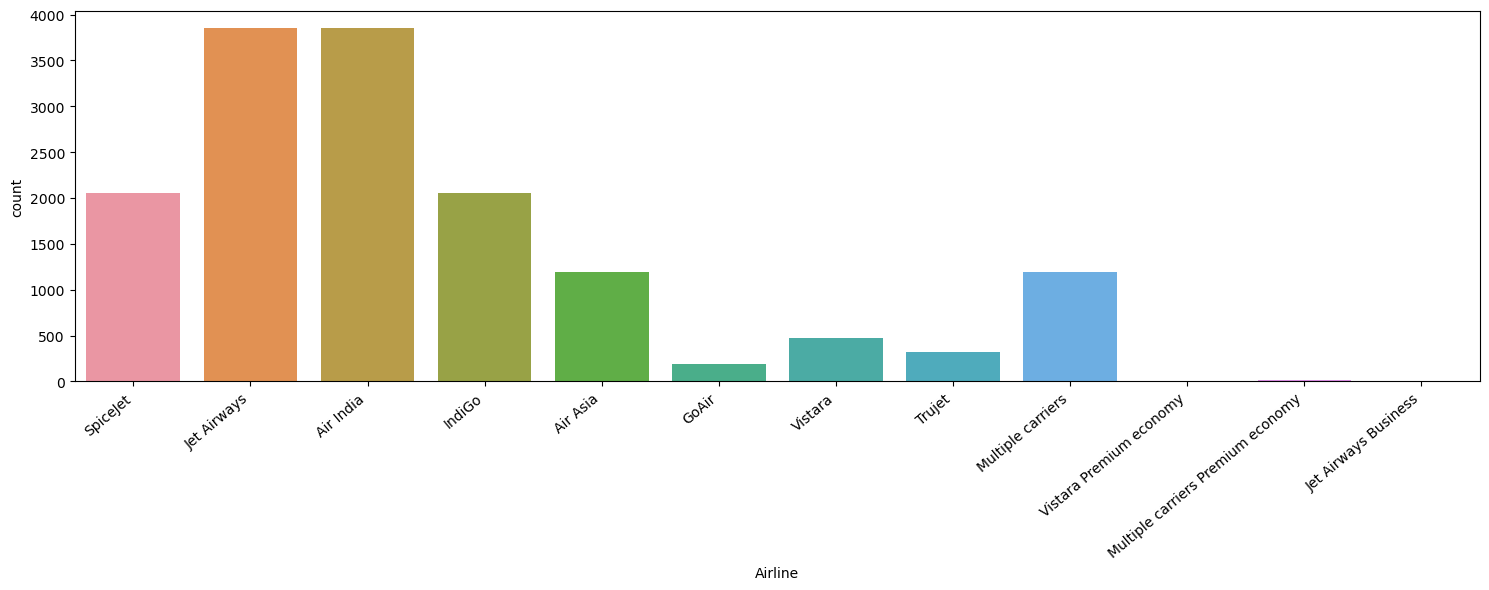

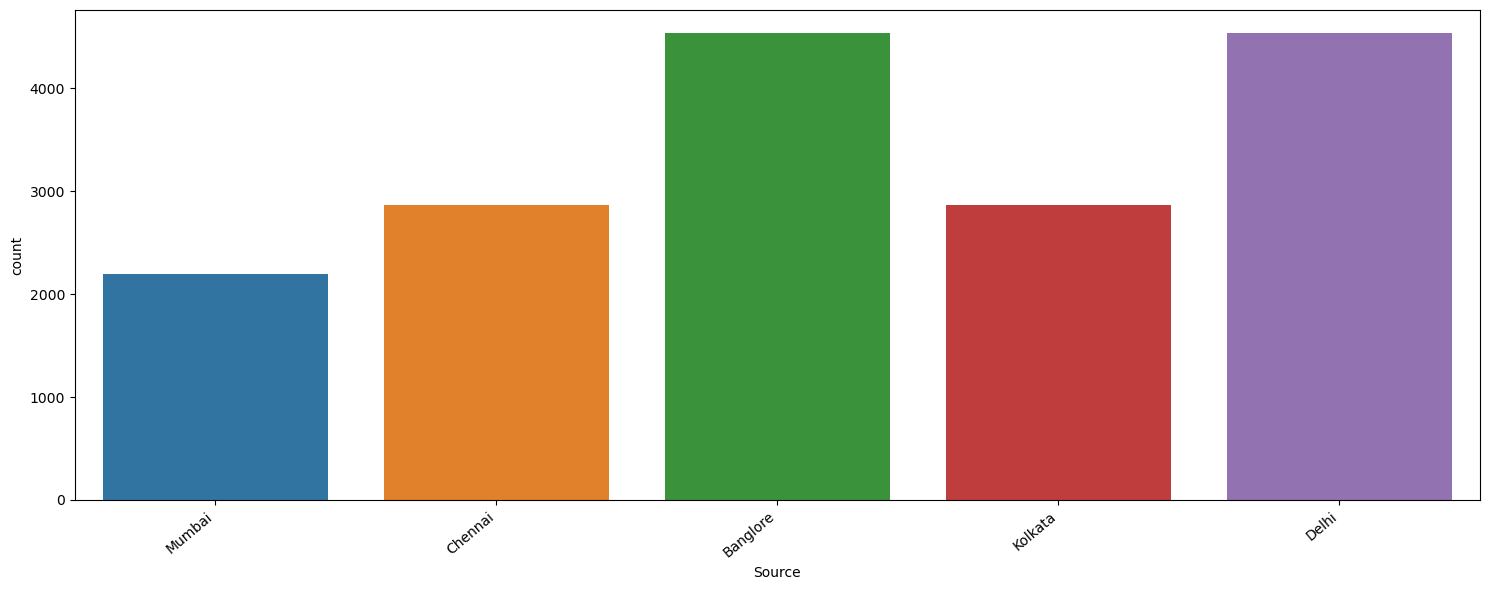

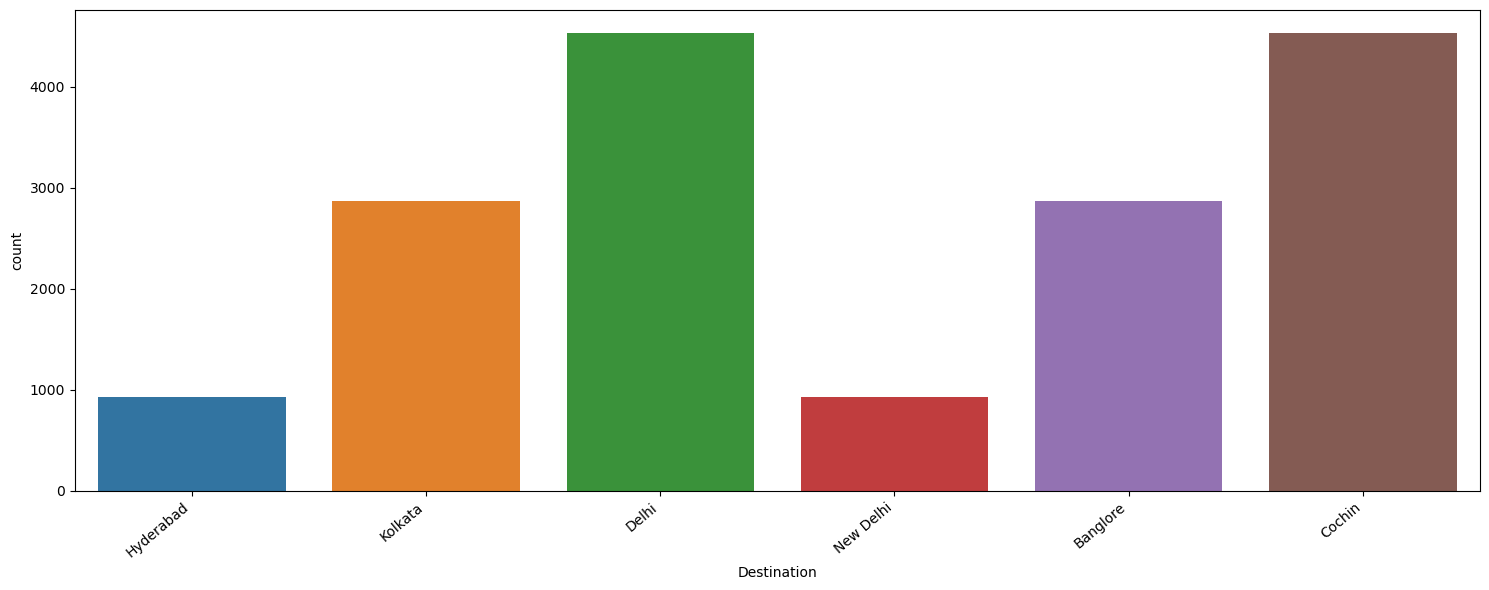

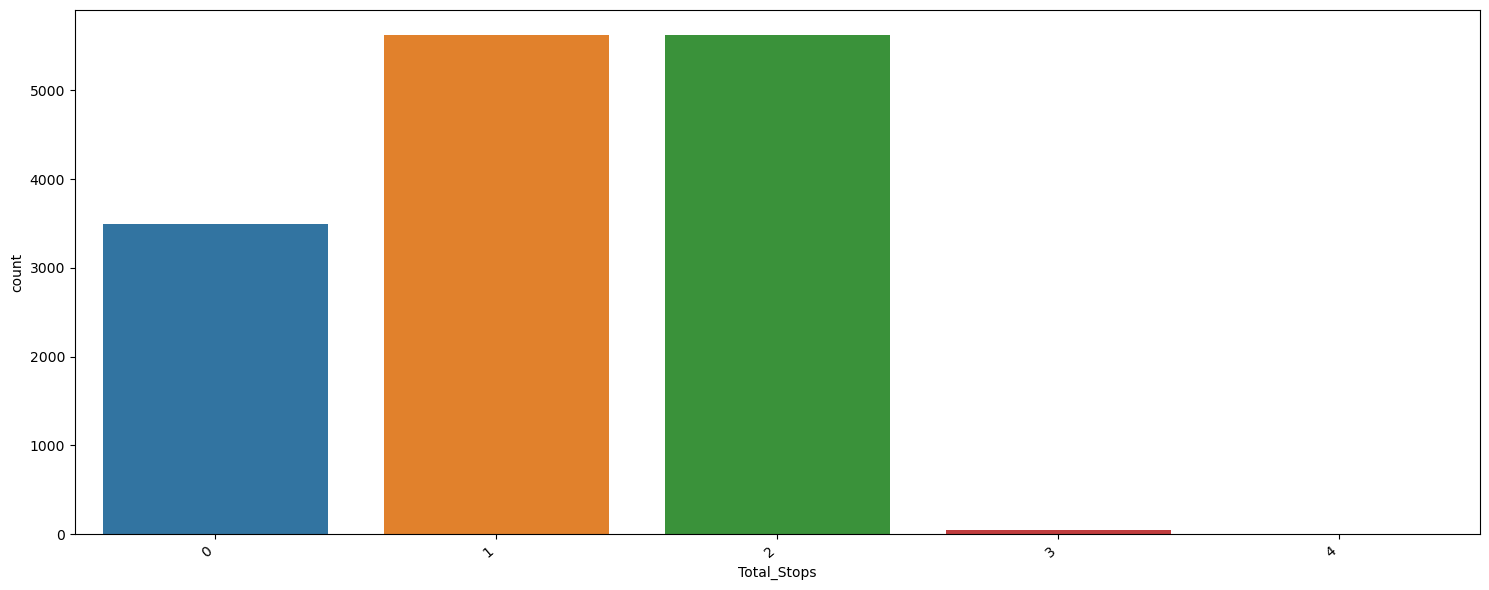

In [817]:
for i in ['Airline','Source','Destination','Total_Stops']:
    plt.figure(figsize=(15,6))
    sns.countplot(data=data,x=i)
    ax=sns.countplot(x=i,data=data.sort_values('Price',ascending=True))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
    plt.tight_layout()
    plt.show()
    print("\n\n")

In [818]:
Airline=pd.get_dummies(data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [819]:
data=pd.concat([data,Airline],axis=1)
data.head()

#we have converted object data type into numeric data type for the system to understand ,and then concated it,now we can delete airlline colums as its numeric data is available

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [820]:
data.drop(['Airline'],axis=1,inplace=True)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


In [821]:
#SOURCE AND DESTINATION
list1=['Source','Destination']
for l in list1:
    print(data[l].value_counts(),"\n")

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 



In [822]:
data=pd.get_dummies(data=data,columns=list1,drop_first=True)
data.head()
#Dummy variables are binary (0 or 1) variables created to represent a categorical variable with two or more categories.
#For each category, a dummy variable is created, where the variable is equal to 1 if the category is present,
#and 0 if it is not.

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,Month,Day,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,3,24,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,0,0,0,0,0,1


In [823]:
#ROUTE
route=data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [824]:
route['Route_1']=route['Route'].str.split('→ ').str[0]
route['Route_2']=route['Route'].str.split('→ ').str[1]
route['Route_3']=route['Route'].str.split('→ ').str[2]
route['Route_4']=route['Route'].str.split('→ ').str[3]
route['Route_5']=route['Route'].str.split('→ ').str[4]
route.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_15968\1152165220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→ ').str[0]
C:\Users\karth\AppData\Local\Temp\ipykernel_15968\1152165220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→ ').str[1]
C:\Users\karth\AppData\Local\Temp\ipykernel_15968\1152165220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [825]:
route.fillna('None',inplace=True)
route.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_15968\1909610652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None',inplace=True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [826]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=le.fit_transform(route[col])
route.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_15968\484317346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])
C:\Users\karth\AppData\Local\Temp\ipykernel_15968\484317346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])
C:\Users\karth\AppData\Local\Temp\ipykernel_15968\484317346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,24,12,4
1,CCU → IXR → BBI → BLR,2,25,1,3,4
2,DEL → LKO → BOM → COK,3,32,4,5,4
3,CCU → NAG → BLR,2,34,3,12,4
4,BLR → NAG → DEL,0,34,8,12,4


In [827]:
route.drop(['Route'],axis=1,inplace=True)
route.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_15968\29689285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop(['Route'],axis=1,inplace=True)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,24,12,4
1,2,25,1,3,4
2,3,32,4,5,4
3,2,34,3,12,4
4,0,34,8,12,4


In [828]:
data=pd.concat([data,route],axis=1)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,Month,Day,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,3897,22,20,1,10,3,24,...,0,0,0,0,1,0,13,24,12,4
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,0,0,2,25,1,3,4
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,1,0,0,0,0,3,32,4,5,4
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,0,0,2,34,3,12,4
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,1,0,34,8,12,4


In [829]:
data.drop(['Route'],axis=1,inplace=True)
data.head()
#this is our final dataset which has values in numerical format to feed to the the machine learning model.
#we can use regression to test the data and make a model.
#we use 90 % data to create the model and then test the model on remaining 10% to be sure

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_min,Arrival_Time_in_hours,Arrival_Time_in_min,Month,Day,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,3,24,0,...,0,0,0,0,1,0,13,24,12,4
1,445,2,7662,5,50,13,15,1,5,1,...,0,0,0,0,0,2,25,1,3,4
2,1140,2,13882,9,25,4,25,9,6,0,...,1,0,0,0,0,3,32,4,5,4
3,325,1,6218,18,5,23,30,12,5,0,...,0,0,0,0,0,2,34,3,12,4
4,285,1,13302,16,50,21,35,1,3,0,...,0,0,0,0,1,0,34,8,12,4
